In [17]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df = load_iris()

In [4]:
x = df.data
y = df.target

In [5]:
s = StandardScaler()
x_scaled = s.fit_transform(x)

In [8]:
x.shape

(150, 4)

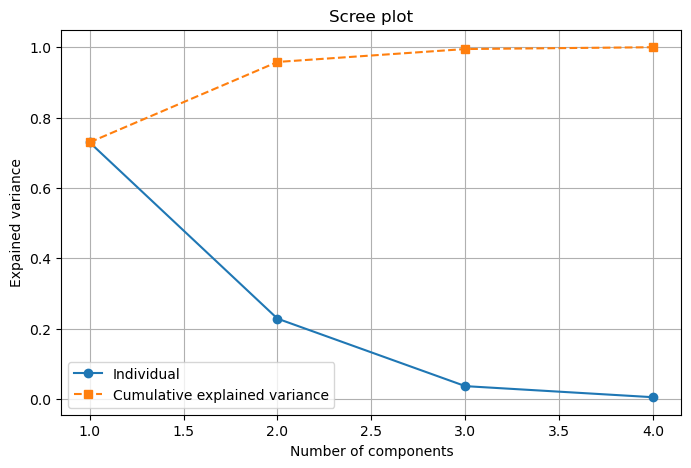

In [12]:
#Apply PCA
pca = PCA()
x_pca = pca.fit_transform(x_scaled)

#Scree plot

plt.figure(figsize=(8,5))
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_,'o-',label="Individual")
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),np.cumsum(pca.explained_variance_ratio_),'s--',label="Cumulative explained variance")
plt.xlabel("Number of components")
plt.ylabel("Expained variance")
plt.title("Scree plot")
plt.grid(True)
plt.legend()
         

In [14]:
pca_95 = PCA(n_components=0.95)
x_reduced = pca_95.fit_transform(x_scaled)
print(f"Reduced Shape:",{x_reduced.shape})

Reduced Shape: {(150, 2)}


VISUALIZE TOP 2 COMPONENTS

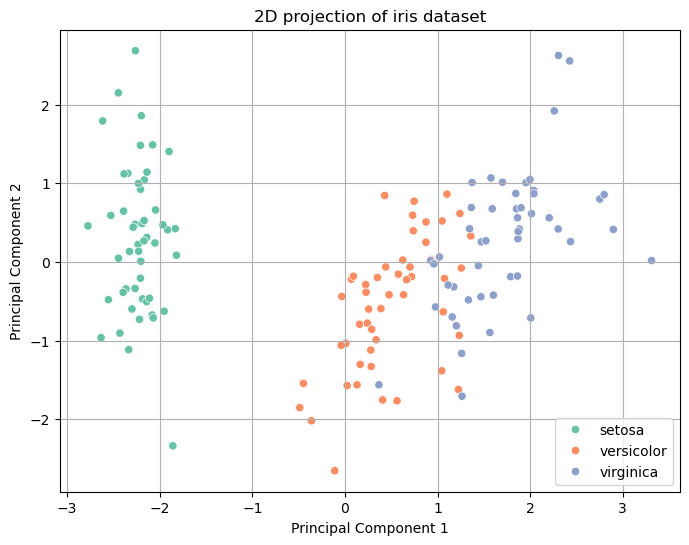

In [19]:
pca_2d = PCA(n_components=2)
x_2d=pca_2d.fit_transform(x_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=x_2d[:,0],y=x_2d[:,1],hue=df.target_names[y],palette='Set2')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D projection of iris dataset")
plt.grid(True)


In [25]:
df = pd.read_csv("marketing_campaign.csv",sep="\t")

In [26]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [31]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [30]:
df["Income"] = df["Income"].fillna(df["Income"].mean())


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [36]:
df.corr(numeric_only=True)["Response"].sort_values(ascending=False)


Response               1.000000
AcceptedCmp5           0.326634
AcceptedCmp1           0.293982
AcceptedCmp3           0.254258
MntWines               0.247254
MntMeatProducts        0.236335
NumCatalogPurchases    0.220810
AcceptedCmp4           0.177019
AcceptedCmp2           0.169293
NumWebPurchases        0.148730
MntGoldProds           0.139850
Income                 0.132756
MntFruits              0.125289
MntSweetProducts       0.117372
MntFishProducts        0.111331
NumStorePurchases      0.039363
Year_Birth             0.021325
NumDealsPurchases      0.002238
Complain              -0.001707
NumWebVisitsMonth     -0.003987
ID                    -0.021968
Kidhome               -0.080008
Teenhome              -0.154446
Recency               -0.198437
Z_CostContact               NaN
Z_Revenue                   NaN
Name: Response, dtype: float64

In [39]:
x = df[["AcceptedCmp5","AcceptedCmp3","AcceptedCmp1","MntWines","MntMeatProducts","NumCatalogPurchases","AcceptedCmp4","AcceptedCmp2","NumWebPurchases","MntGoldProds","Income","MntFruits","MntSweetProducts","MntFishProducts","Kidhome","Teenhome","Recency"]]
y = df["Response"]

In [40]:
s = StandardScaler()
x_scaled = s.fit_transform(x)

In [41]:
x.shape

(2240, 17)

In [42]:
df.shape

(2240, 29)

In [43]:
pca_95 = PCA(n_components=0.95)
x_reduced = pca_95.fit_transform(x_scaled)
print(f"Reduced Shape:",{x_reduced.shape})

Reduced Shape: {(2240, 15)}


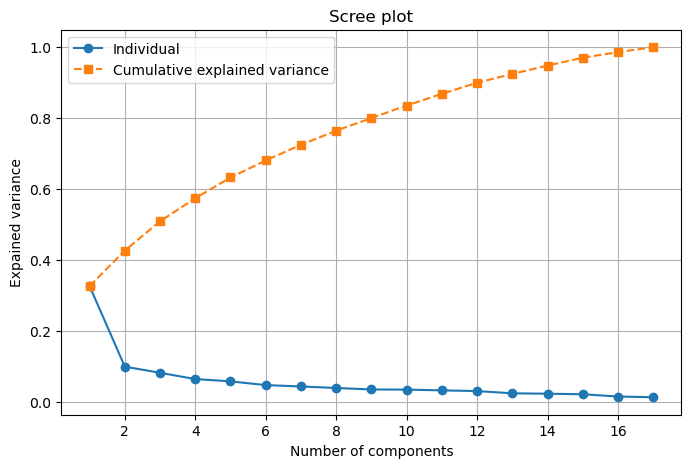

In [44]:
#Apply PCA
pca = PCA()
x_pca = pca.fit_transform(x_scaled)

#Scree plot

plt.figure(figsize=(8,5))
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_,'o-',label="Individual")
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),np.cumsum(pca.explained_variance_ratio_),'s--',label="Cumulative explained variance")
plt.xlabel("Number of components")
plt.ylabel("Expained variance")
plt.title("Scree plot")
plt.grid(True)
plt.legend()
         